# Analyse des données de l'assurance maladie sur le mois de janvier 2022

### Contexte

L'assurance maladie en France constitue un pilier fondamental du système de protection sociale, visant à assurer l'accès équitable aux soins de santé pour tous les citoyens et résidents. Dans ce contexte, une analyse approfondie des dépenses engagées par l'assurance maladie revêt une importance primordiale pour évaluer la viabilité et l'efficacité du système de santé français. La compréhension des schémas de dépenses, des tendances évolutives et des facteurs sous-jacents est cruciale pour éclairer les décisions politiques et administratives visant à garantir la durabilité financière tout en préservant l'accès universel aux soins de santé de qualité.

Dans cette optique, une interrogation émergente concerne l'identification des principaux moteurs des dépenses de l'assurance maladie en France.

### Présentation du jeu de données

Le site de l'assurance maladie comporte un onglet "Etudes et données" dans lequel se trouve des études, des synthèses, des articles et des données sur différents thèmes mis à jour tous les mois ou tous les ans.

Pour notre étude, nous avons choisi de nous intéresser aux données mensuelles des dépenses de l'assurance maladie, plus précisément celles de Janvier 2022. Un mois donc banal au niveau de l'actualité sanitaire, mais qui nous permettra de nous faire une idée des dépenses de l'assurance maladie en temps normal.
Il s'agit d'un fichier CSV de 5.35 Go contenant 34 409 062 de lignes et 56 colonnes et délimité par des points-virgules ";". Il est disponible sur le [site de l'assurance maladie](https://assurance-maladie.ameli.fr/etudes-et-donnees/open-damir-depenses-sante-interregimes).

Un fichier Excel est également disponible sur la même page web contenant la signification de chaque colonne du fichier CSV.

# Import des données et des librairies

Au vu de la taille du jeu de données, nous allons en prendre un échantillon de 10% pour pouvoir travailler dessus et le nettoyre. Ensuite nous pourrons commencer l'annalyse des données.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
raw_data = pd.read_csv('data/A202201.csv', delimiter=';', nrows=3440906)

In [58]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3440906 entries, 0 to 3440905
Data columns (total 56 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FLX_ANN_MOI   int64  
 1   ORG_CLE_REG   int64  
 2   AGE_BEN_SNDS  int64  
 3   BEN_RES_REG   int64  
 4   BEN_CMU_TOP   int64  
 5   BEN_QLT_COD   int64  
 6   BEN_SEX_COD   int64  
 7   DDP_SPE_COD   int64  
 8   ETE_CAT_SNDS  int64  
 9   ETE_REG_COD   int64  
 10  ETE_TYP_SNDS  int64  
 11  ETP_REG_COD   int64  
 12  ETP_CAT_SNDS  int64  
 13  MDT_TYP_COD   int64  
 14  MFT_COD       int64  
 15  PRS_FJH_TYP   int64  
 16  PRS_ACT_COG   float64
 17  PRS_ACT_NBR   float64
 18  PRS_ACT_QTE   int64  
 19  PRS_DEP_MNT   float64
 20  PRS_PAI_MNT   float64
 21  PRS_REM_BSE   float64
 22  PRS_REM_MNT   float64
 23  FLT_ACT_COG   float64
 24  FLT_ACT_NBR   float64
 25  FLT_ACT_QTE   int64  
 26  FLT_PAI_MNT   float64
 27  FLT_DEP_MNT   float64
 28  FLT_REM_MNT   float64
 29  SOI_ANN       int64  
 30  SOI_MOI       int6

Premièrement, nous allons établir un persona qui est le plus susceptible a recevoir des soins. Pour ce faire on va commencer par regarder la tranche d'age et le sexe qui sont les plus représentés dans le jeu de données.

In [59]:
ageAndSex = raw_data[["BEN_SEX_COD", "AGE_BEN_SNDS"]]
male = ageAndSex.where(ageAndSex.BEN_SEX_COD == 1)
female = ageAndSex.where(ageAndSex.BEN_SEX_COD == 2)

# histogram of ages by sex

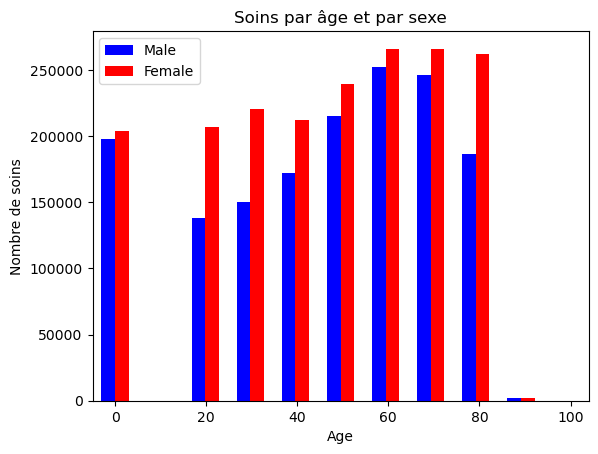

In [60]:
ageAndSex = raw_data[["BEN_SEX_COD", "AGE_BEN_SNDS"]]
male = ageAndSex.where(ageAndSex.BEN_SEX_COD == 1).dropna()
female = ageAndSex.where(ageAndSex.BEN_SEX_COD == 2).dropna()

plt.title("Soins par âge et par sexe")
plt.xlabel("Age")
plt.ylabel("Nombre de soins")
plt.hist(male["AGE_BEN_SNDS"], label="Male", color="blue", width=-3)
plt.hist(female["AGE_BEN_SNDS"], label="Female", color="red", width=3)
plt.legend()
plt.show()

Sur le graphique ci-dessus, les femmes sont sur-représentées par rapport aux hommes. 
La tranche d'âge des 60-69 ans et des 70-79 ans sont les plus représentées.

Cela s'explique par le fait que les femmes sont plus suceptibles que les hommes à aller chez le medecin et que les personnes agées sont plus encleines à développer des problèmes de santé (Cancers, maladies cardiovasculaires, etc...).

Les 0-19 sont plus représentés que les autres tranches d'age. Cela peut s'expliquer par le fait que les enfants sont plus susceptibles de tomber malade que les adultes et que la colonne comporte une tranche d'age de 20 ans contre 10 ans pour les autres tranches d'age.

La valeur 99 correspond aux personnes dont l'age est inconnu.

### Est-ce que la région a aussi un impact notre persona ?

Il y a plusieurs facteurs a prendre en compte avant de tirer des conclusions hatives. En effet, il faut prendre en compte la densité de population de chaque région, le nombre de médecins par habitant, le nombre d'hopitaux, etc...

             BEN_SEX_COD  AGE_BEN_SNDS
BEN_RES_REG                           
5                    1.0     45.005183
11                   1.0     44.376230
24                   1.0     46.914707
27                   1.0     47.236312
28                   1.0     45.833907
32                   1.0     44.377346
44                   1.0     45.238557
52                   1.0     46.147864
53                   1.0     46.791083
75                   1.0     47.566636
76                   1.0     47.964360
84                   1.0     45.935274
93                   1.0     47.798889
99                   1.0     49.389858


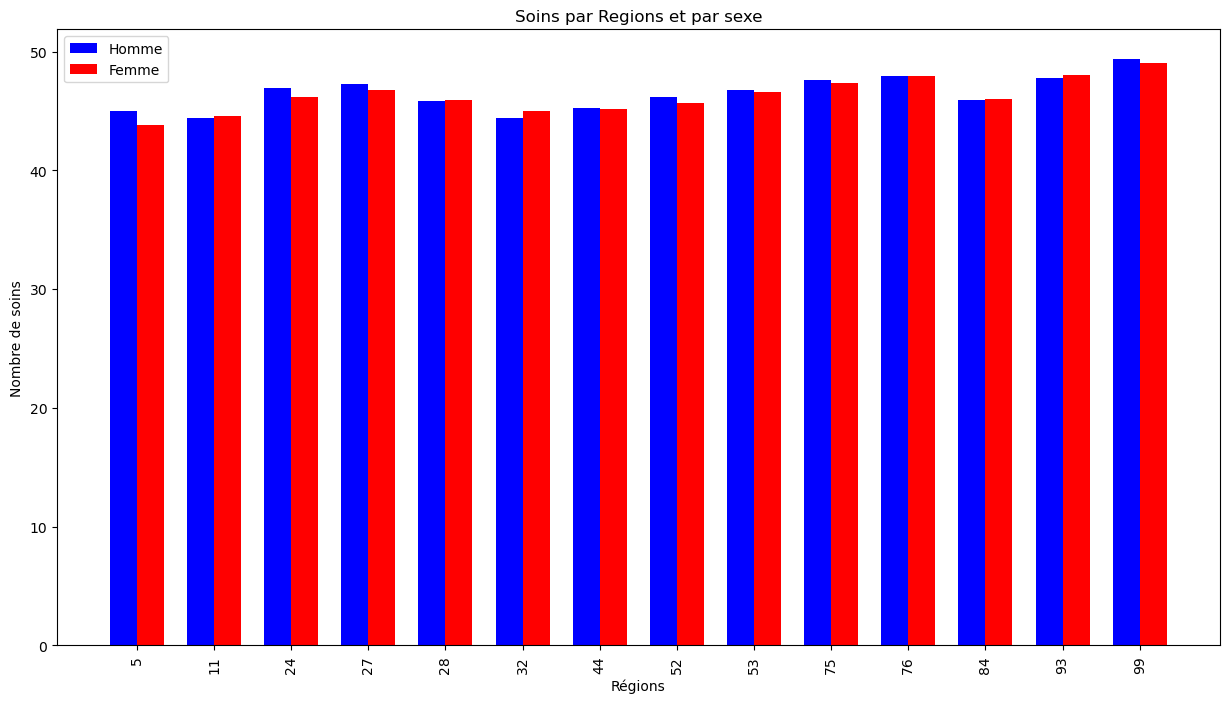

In [61]:
ageAndSex = raw_data[["BEN_SEX_COD", "AGE_BEN_SNDS", "BEN_RES_REG"]]
male = ageAndSex[ageAndSex.BEN_SEX_COD == 1]
female = ageAndSex[ageAndSex.BEN_SEX_COD == 2]

male_count_per_localities = male.groupby("BEN_RES_REG").mean()
female_count_per_localities = female.groupby("BEN_RES_REG").mean()

print(male_count_per_localities)

fig, ax = plt.subplots(figsize=(15, 8))

x = range(len(male_count_per_localities))
bar_width = 0.35  # Set the width of the bars

plt.bar(x, male_count_per_localities["AGE_BEN_SNDS"], color="blue", label="Homme", width=bar_width)
plt.bar([i + bar_width for i in x], female_count_per_localities["AGE_BEN_SNDS"], color="Red", label="Femme", width=bar_width)

plt.title("Soins par Regions et par sexe")
plt.xlabel("Régions")
plt.ylabel("Nombre de soins")
plt.xticks([i + bar_width/2 for i in x], male_count_per_localities.index, rotation=90)
plt.legend()
plt.show()

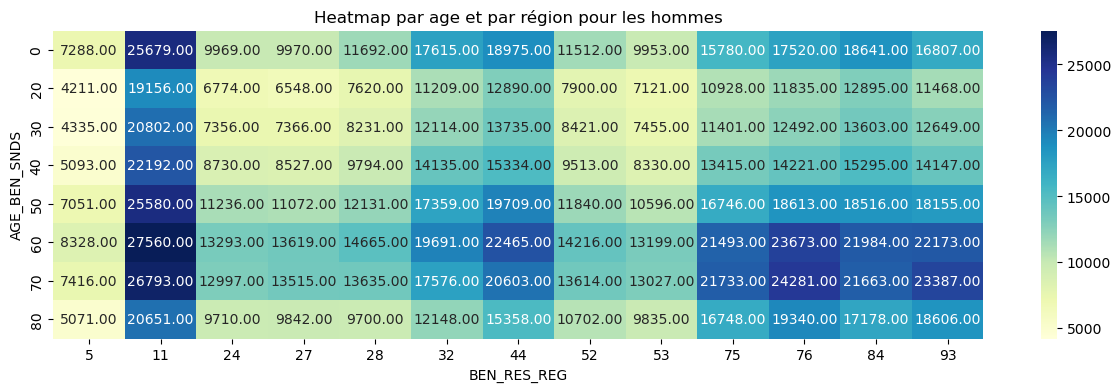

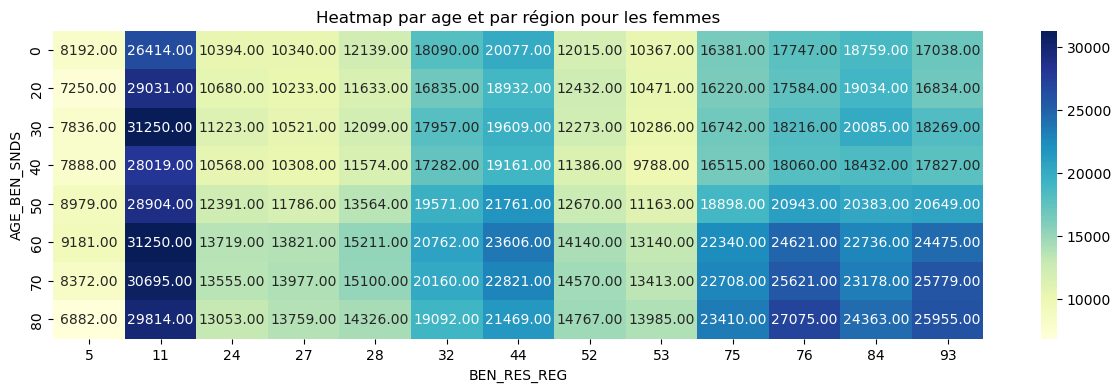

In [82]:
ageAndSex = raw_data[["BEN_SEX_COD", "AGE_BEN_SNDS", "BEN_RES_REG"]]
male = ageAndSex[(ageAndSex.BEN_SEX_COD == 1) & (ageAndSex.AGE_BEN_SNDS != 99) & (ageAndSex.BEN_RES_REG != 99)]
female = ageAndSex[(ageAndSex.BEN_SEX_COD == 2) & (ageAndSex.AGE_BEN_SNDS != 99) & (ageAndSex.BEN_RES_REG != 99)]

male_pivot_table = male.pivot_table(index="AGE_BEN_SNDS", columns="BEN_RES_REG", values="AGE_BEN_SNDS", aggfunc="count")
# print(male_pivot_table)

female_pivot_table = female.pivot_table(index="AGE_BEN_SNDS", columns="BEN_RES_REG", values="AGE_BEN_SNDS", aggfunc="count")
# print(male_pivot_table)

plt.figure(figsize=(15, 4))
sns.heatmap(male_pivot_table, annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('Heatmap par age et par région pour les hommes')
plt.show()

plt.figure(figsize=(15, 4))
sns.heatmap(female_pivot_table, annot=True, cmap="YlGnBu", fmt='.2f')
plt.title('Heatmap par age et par région pour les femmes')
plt.show()

| BEN_RES_REG | Libellé Région de Résidence du Bénéficiaire   | Nombre d'habitants |
| ----------- | --------------------------------------------- | ------------------ |
| 5           | Régions et Départements d'outre-mer           | 2,181,000          |
| 11          | Ile-de-France                                 | 12,358,932         |
| 24          | Centre-Val de Loire                           | 2,572,278          |
| 27          | Bourgogne-Franche-Comté                       | 2,786,296          |
| 28          | Normandie                                     | 3,317,023          |
| 32          | Hauts-de-France - Nord-Pas-de-Calais-Picardie | 5,980,697          |
| 44          | Grand Est                                     | 5,562,262          |
| 52          | Pays de la Loire                              | 3,907,426          |
| 53          | Bretagne                                      | 3,429,882          |
| 75          | Aquitaine-Limousin-Poitou-Charentes           | 6,110,365          |
| 76          | Languedoc-Roussillon-Midi-Pyrénées            | 6,101,005          |
| 84          | Auvergne-Rhône-Alpes                          | 8,197,325          |
| 93          | Provence-Alpes-Côte d'Azur et Corse           | 5,511,346          |

[Source INED](https://ined.fr/fr/tout-savoir-population/chiffres/france/structure-population/regions/)


La heatmap ici permet d'observer la répartion des classes d'age par région.
A population plus ou moins équivalente, on peut remarquer que les personnes ayant le plus tendance a recevoir des soins se situent dans le Langueoc-Roussillon-Midi-Pyrénées, l'Aquitaine-Limousin-Poitou-Charentes et la Provence-Alpes-Côte d'Azur et Corse.